In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy import stats

In [2]:
Maternal_Health = pd.read_csv("Maternal Health Risk Data Set.csv")
Maternal_Health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
col_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate', 'RiskLevel']
Maternal_Health.columns = col_names
Maternal_Health.head()

# SystolicBP -> Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
# DiasolicBP -> Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.


,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
num_instances = Maternal_Health.shape[0]
num_attributes = Maternal_Health.shape[1]

print("Number of instances:", num_instances)
print("Number of attributes:", num_attributes)


Maternal_Health.dtypes


Number of instances: 1014
Number of attributes: 7


Age              int64
SystolicBP       int64
DiastolicBP      int64
BloodSugar     float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [5]:
# Summary Statistics of continuous features

continuous_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']
Maternal_Health[continuous_features].describe()




,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
bp_compare = Maternal_Health[['SystolicBP', 'DiastolicBP', 'RiskLevel']]
bp_compare.head(10)

,SystolicBP,DiastolicBP,RiskLevel
0,130,80,high risk
1,140,90,high risk
2,90,70,high risk
3,140,85,high risk
4,120,60,low risk
5,140,80,high risk
6,130,70,mid risk
7,85,60,high risk
8,120,90,mid risk
9,130,80,high risk


Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BloodSugar     0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


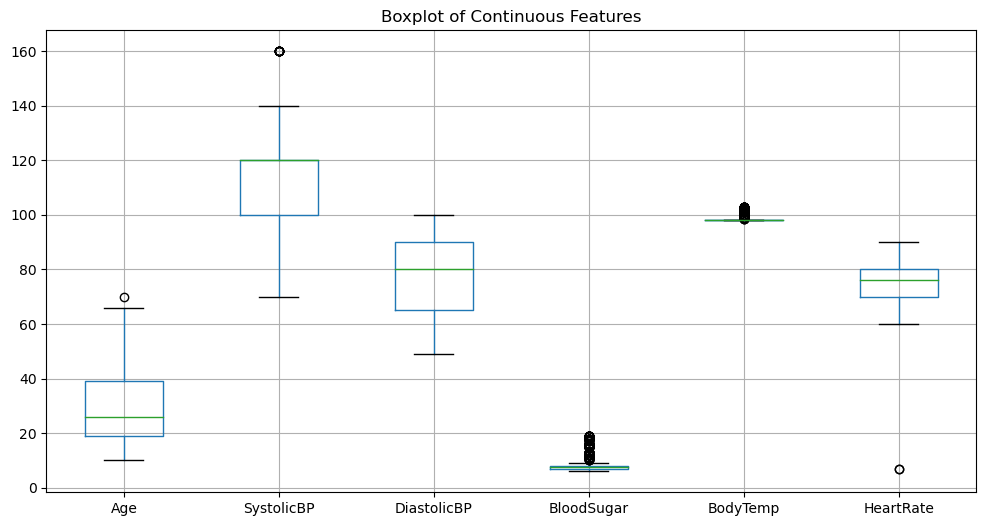

In [7]:
# Check for missing values
missing_values = Maternal_Health.isnull().sum()
print("Missing values:\n", missing_values)

# Check for outliers in continuous features
plt.figure(figsize=(12, 6))
Maternal_Health[continuous_features].boxplot()
plt.title("Boxplot of Continuous Features")
plt.show()


In [8]:
mh_dropcat = Maternal_Health.drop(['RiskLevel'], axis=1)
mh_dropcat.head()

df = mh_dropcat[(np.abs(stats.zscore(mh_dropcat)) < 3).all(axis=1)]

In [9]:
df.shape
df.head() 

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [10]:
# Define a threshold
z_threshold = 3

# Calculate the z-scores of each value in the DataFrame
numeric_cols = Maternal_Health.select_dtypes(include=['int64', 'float64']).columns

z_scores = stats.zscore(Maternal_Health[numeric_cols])

# Create a boolean mask for values with a z-score less than the absolute value of the threshold
mask = np.abs(z_scores) < z_threshold

# Apply the mask to the DataFrame to keep only rows with all values within the threshold
Maternal_Health_OR = Maternal_Health[mask.all(axis=1)]

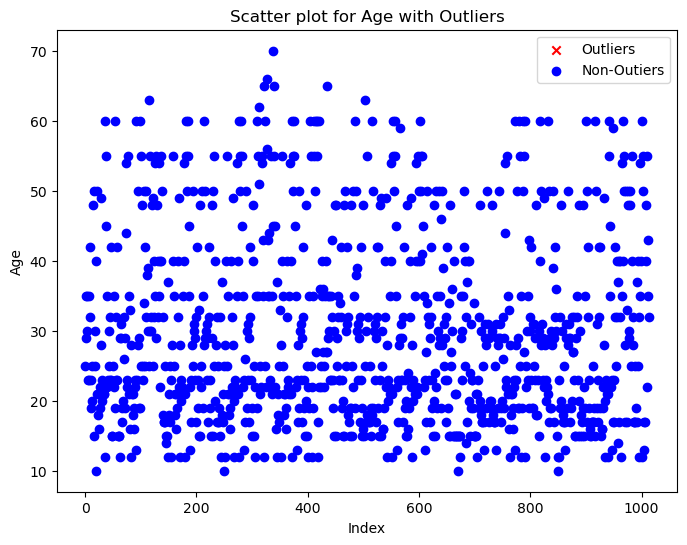

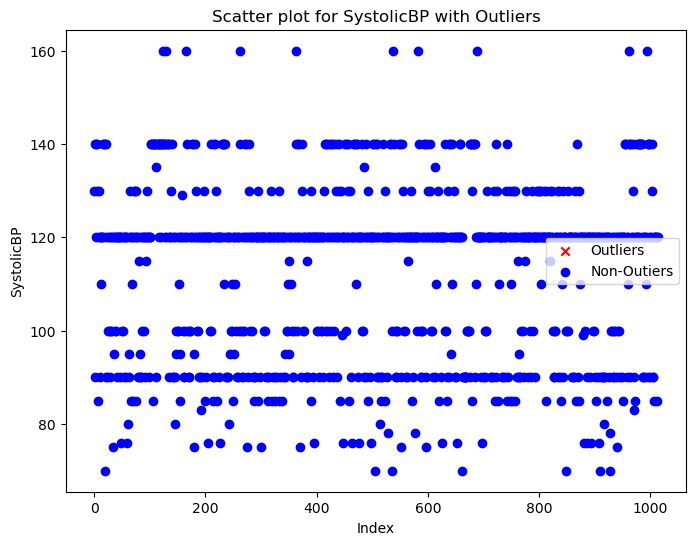

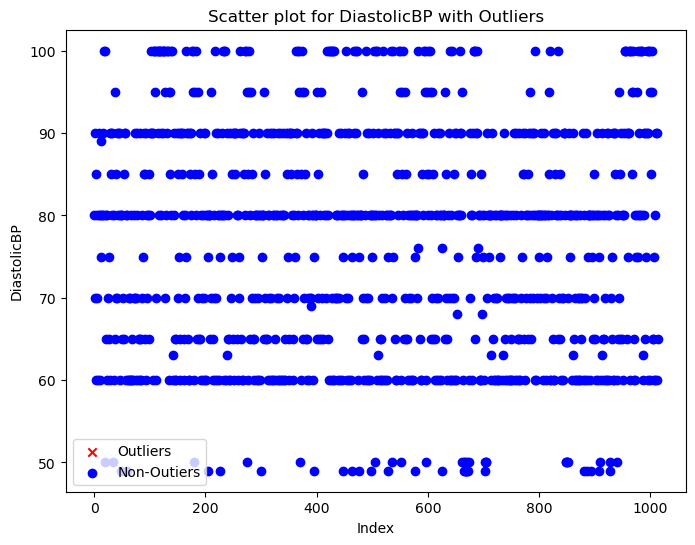

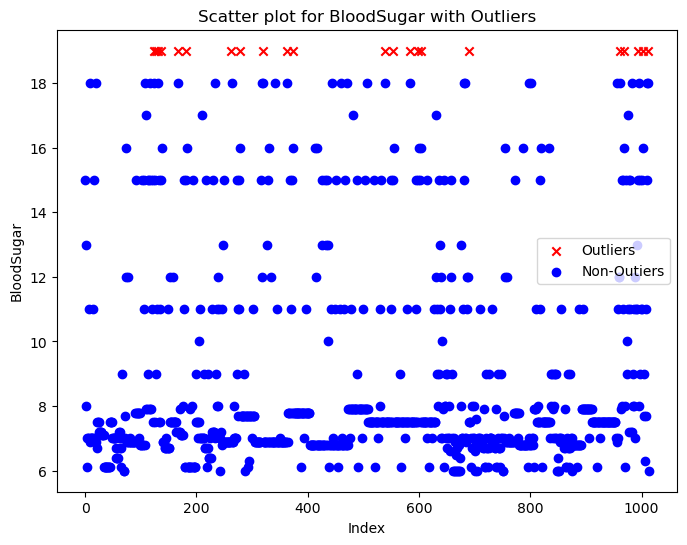

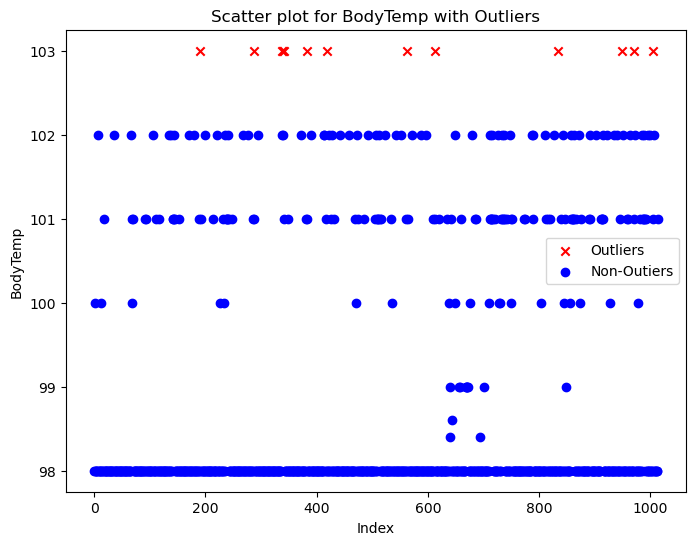

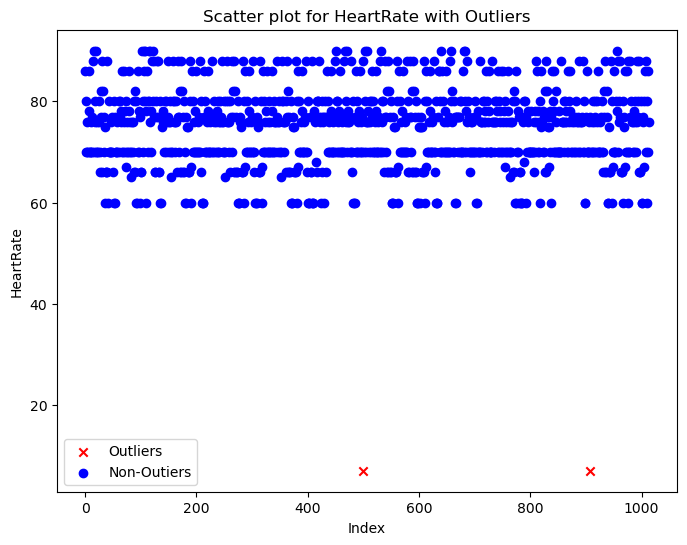

In [11]:
for col in numeric_cols:

    plt.figure(figsize=(8, 6))
    plt.scatter(Maternal_Health.index[~mask[col]], Maternal_Health[col][~mask[col]], marker='x', label='Outliers', color='red')
    plt.scatter(Maternal_Health.index[mask[col]], Maternal_Health[col][mask[col]], marker='o', label='Non-Outiers', color='blue')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()

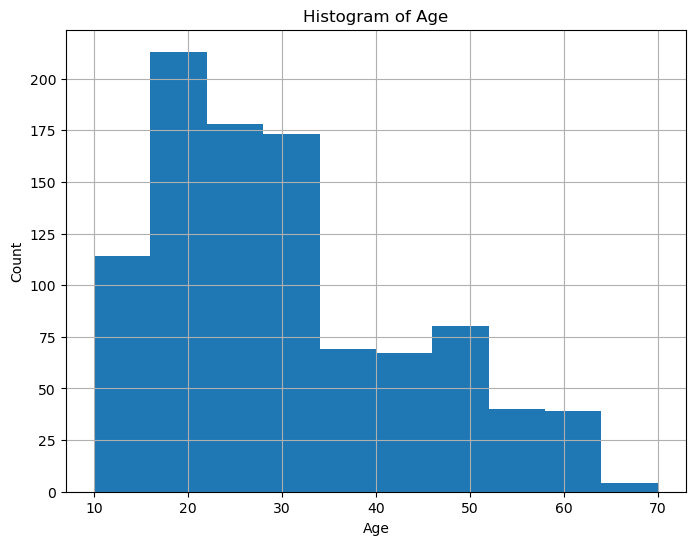

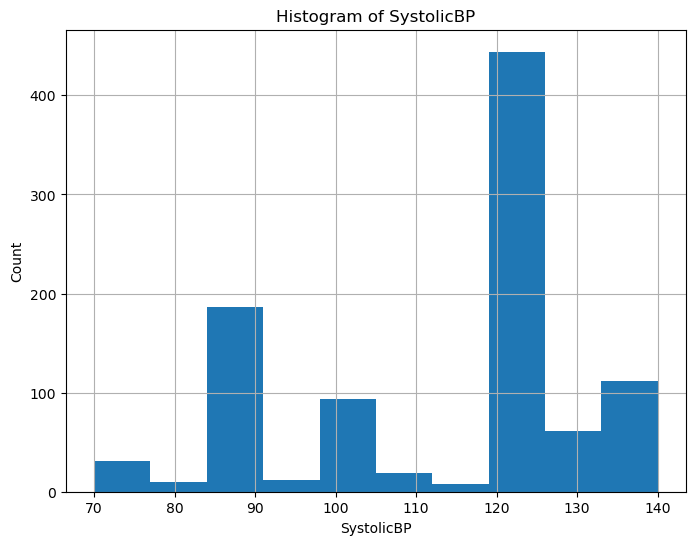

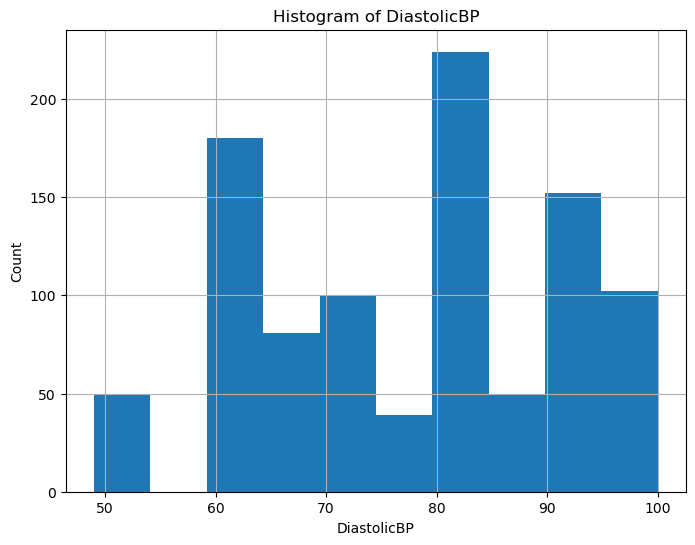

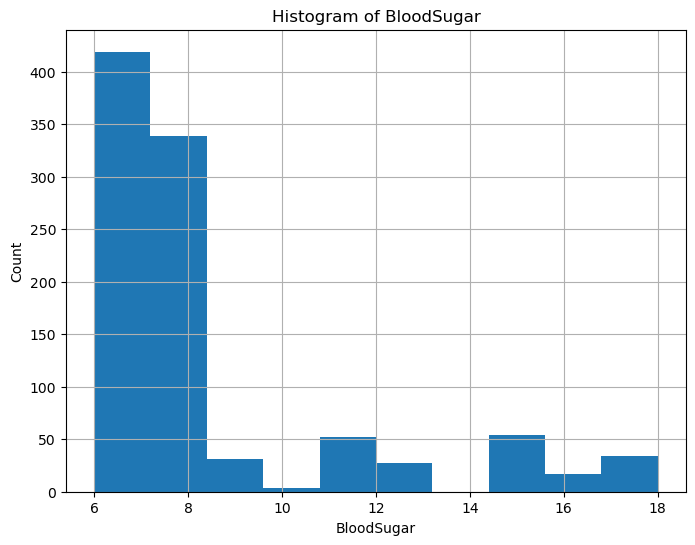

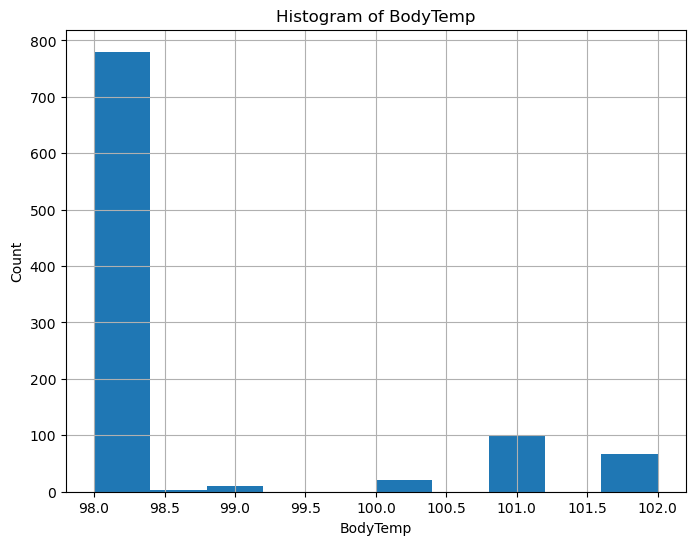

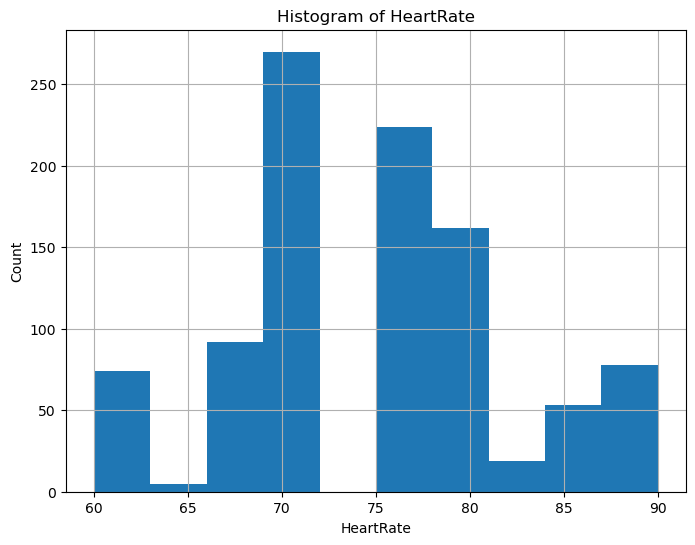

In [12]:
import matplotlib.pyplot as plt

continuous_attributes = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']

for attribute in continuous_attributes:
    plt.figure(figsize=(8, 6))
    Maternal_Health_OR[attribute].hist()
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.title(f'Histogram of {attribute}')
    plt.show()


In [13]:
print(Maternal_Health.shape)
print(Maternal_Health_OR.shape)

Maternal_Health_OR.describe()

(1014, 7)
(977, 7)


,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,29.617195,112.654043,76.126919,8.517349,98.623746,74.422723
std,13.309710,17.716664,13.720881,2.965957,1.299657,7.591546
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,36.000000,120.000000,90.000000,7.900000,98.000000,80.000000
max,70.000000,140.000000,100.000000,18.000000,102.000000,90.000000


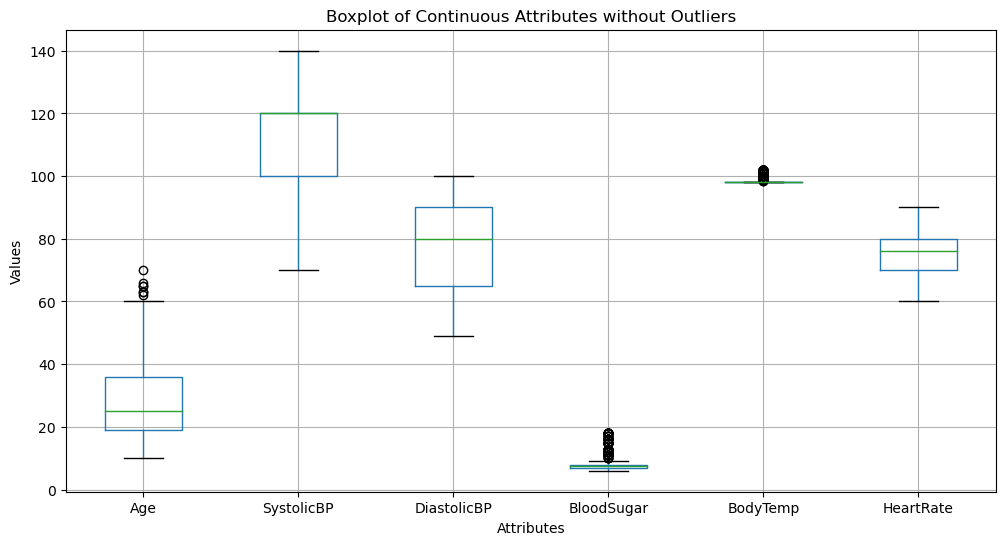

In [14]:
Maternal_Health_OR.count()

plt.figure(figsize=(12, 6))
Maternal_Health_OR[continuous_features].boxplot()
plt.title("Boxplot of Continuous Attributes without Outliers")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.show()



Text(0.5, 1.0, 'Distribution of Risk Levels for Maternal Health')

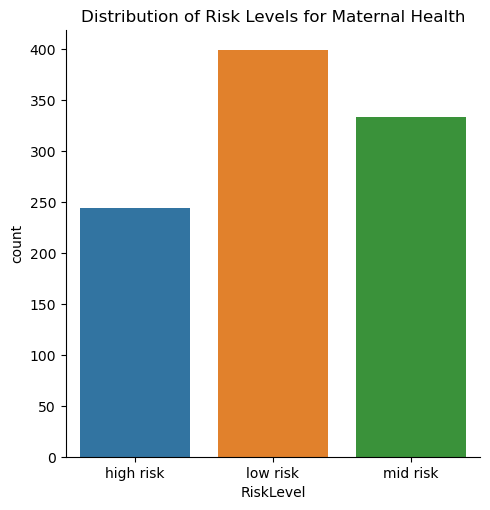

In [15]:
sns.catplot(x='RiskLevel', kind='count', data=Maternal_Health_OR)
plt.title("Distribution of Risk Levels for Maternal Health")

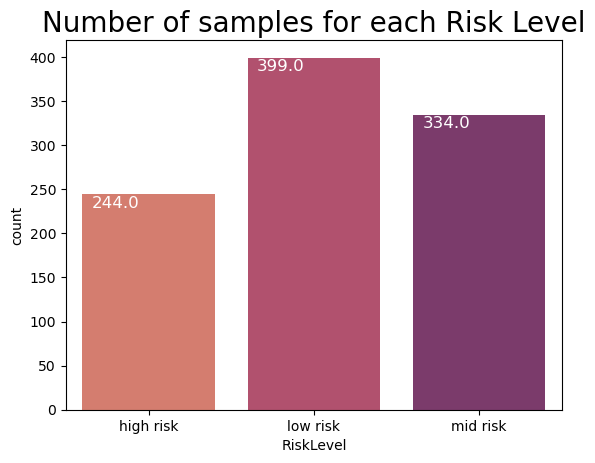

In [16]:
ax = sns.countplot(x="RiskLevel", data=Maternal_Health_OR, palette="flare")
ax.set_title('Number of samples for each Risk Level', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

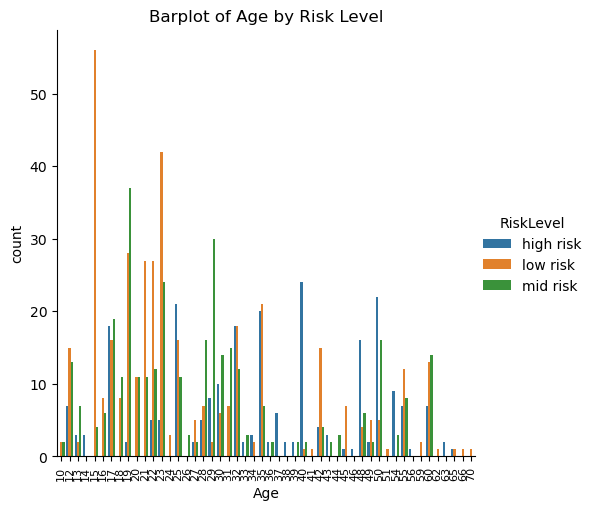

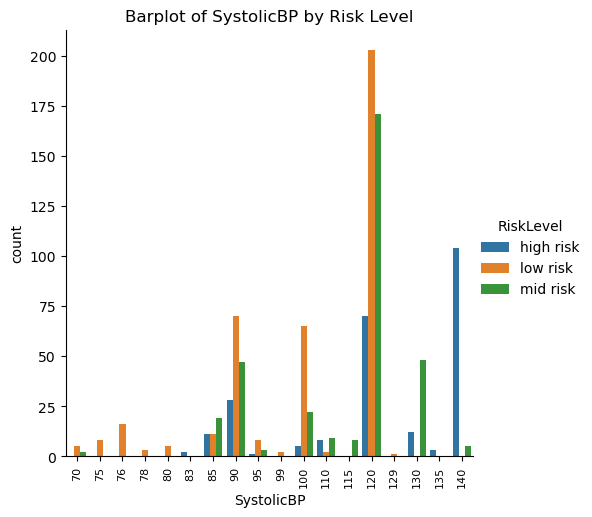

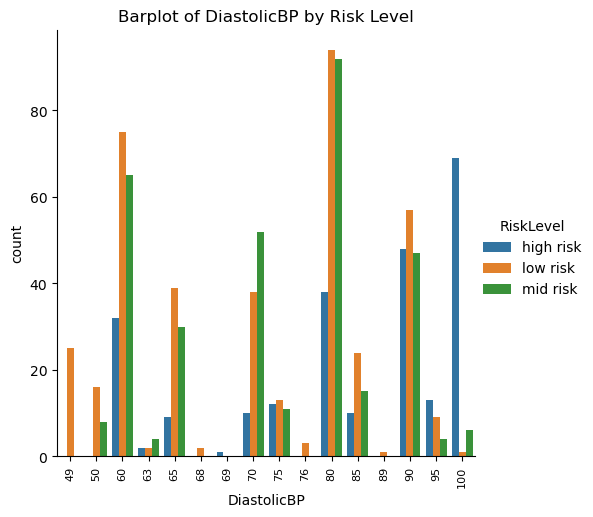

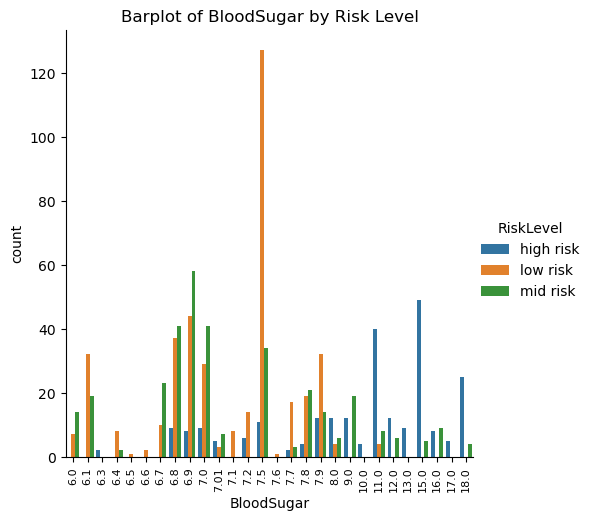

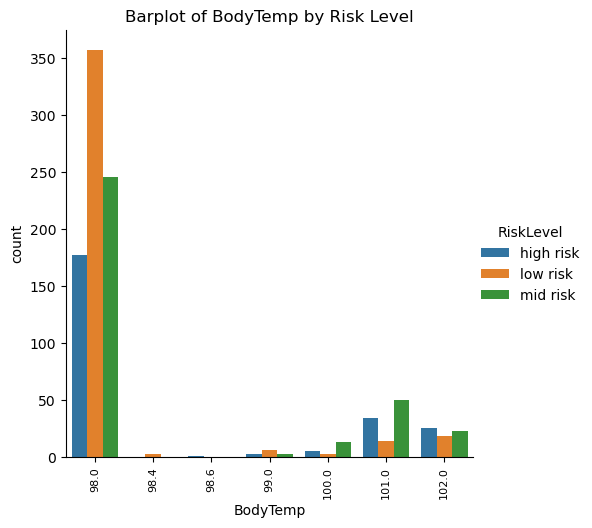

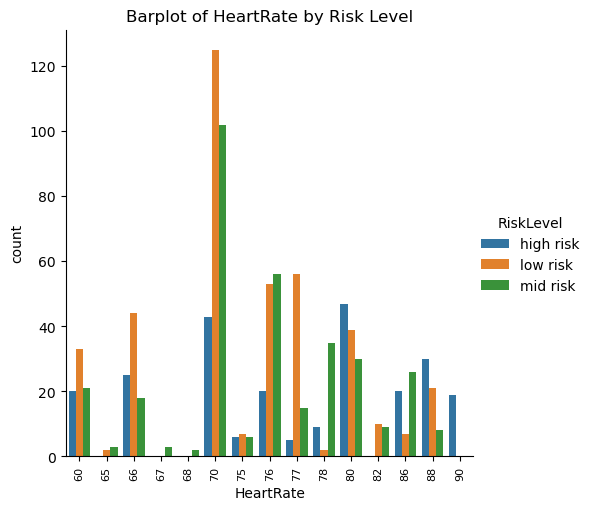

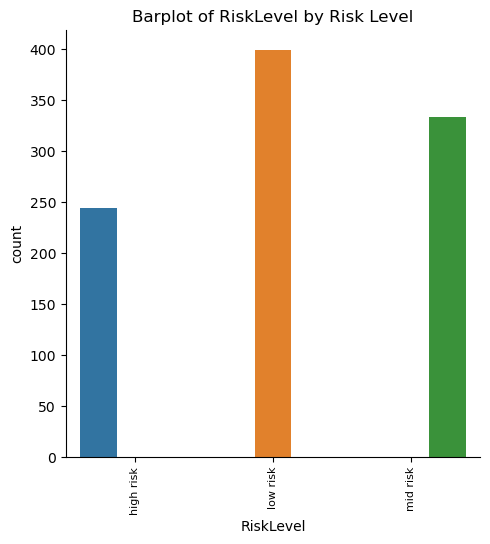

In [17]:
def create_catplot(data, x_column, hue, kind="count"):
    sns.catplot(data=data, x=x_column, hue="RiskLevel", kind=kind)
    plt.title(f"Barplot of {x_column} by Risk Level")
    plt.xticks(rotation=90, fontsize=8)

for column in col_names:
    create_catplot(Maternal_Health_OR,column,'RiskLevel')

plt.show()

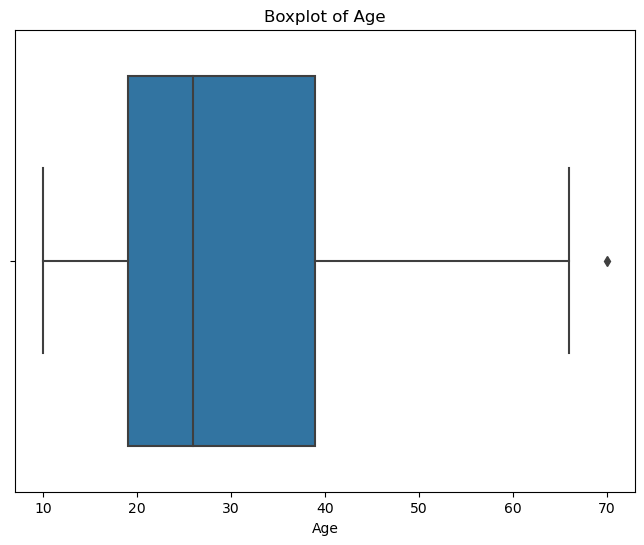

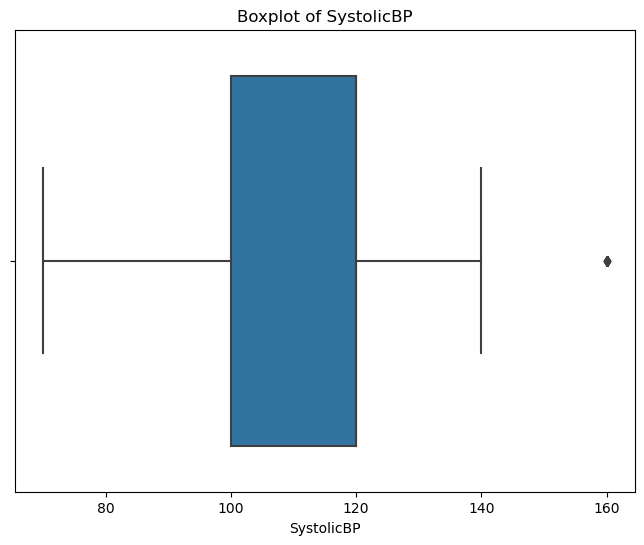

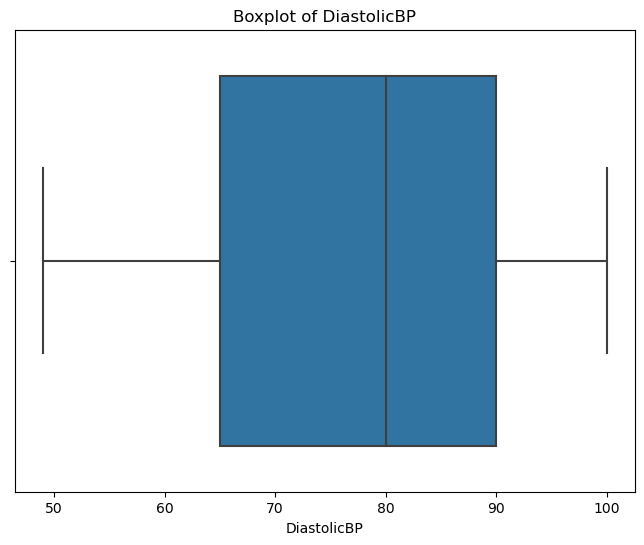

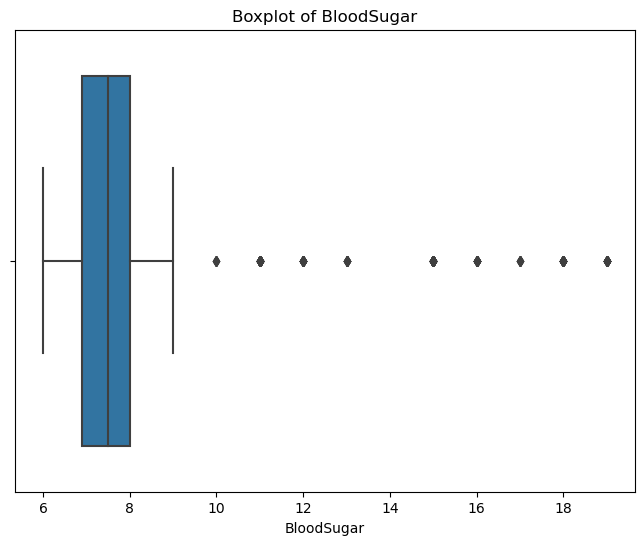

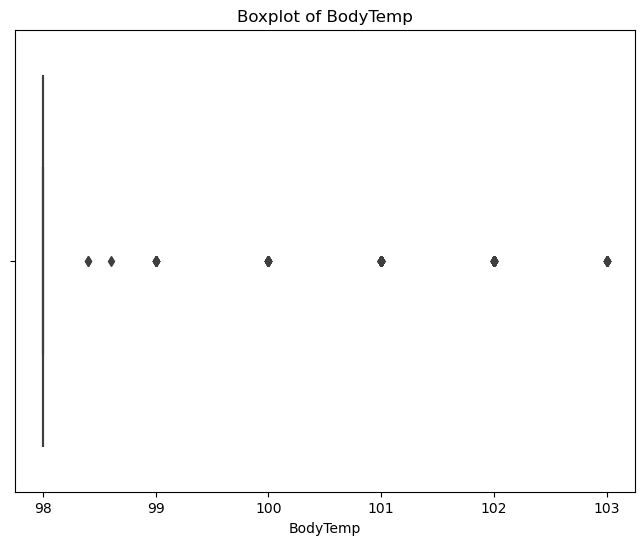

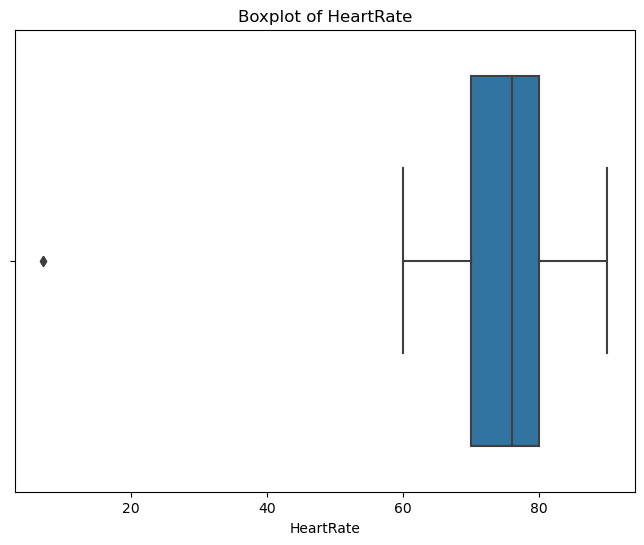

In [18]:
continuous_attributes = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']

for attribute in continuous_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Maternal_Health[attribute])
    plt.xlabel(attribute)
    plt.title(f'Boxplot of {attribute}')
    plt.show()


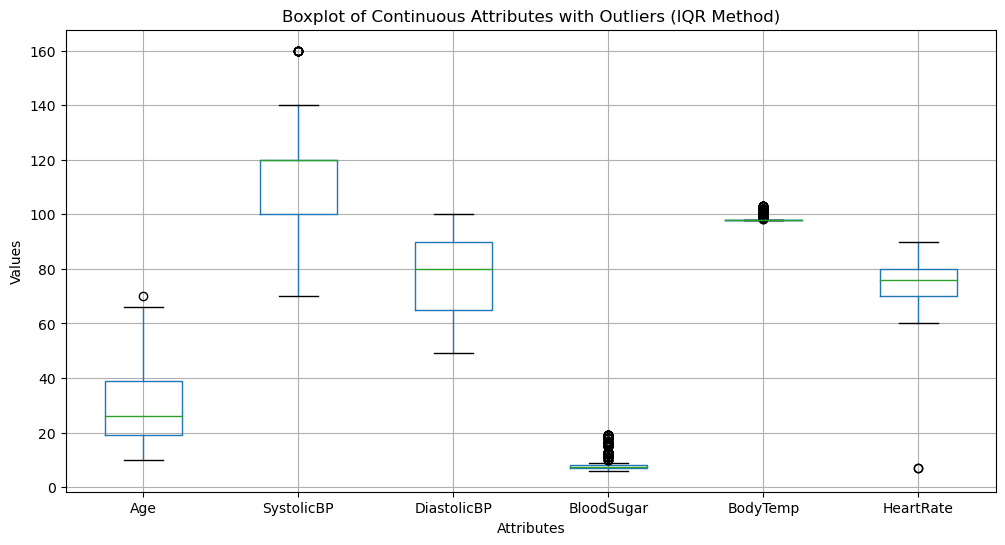

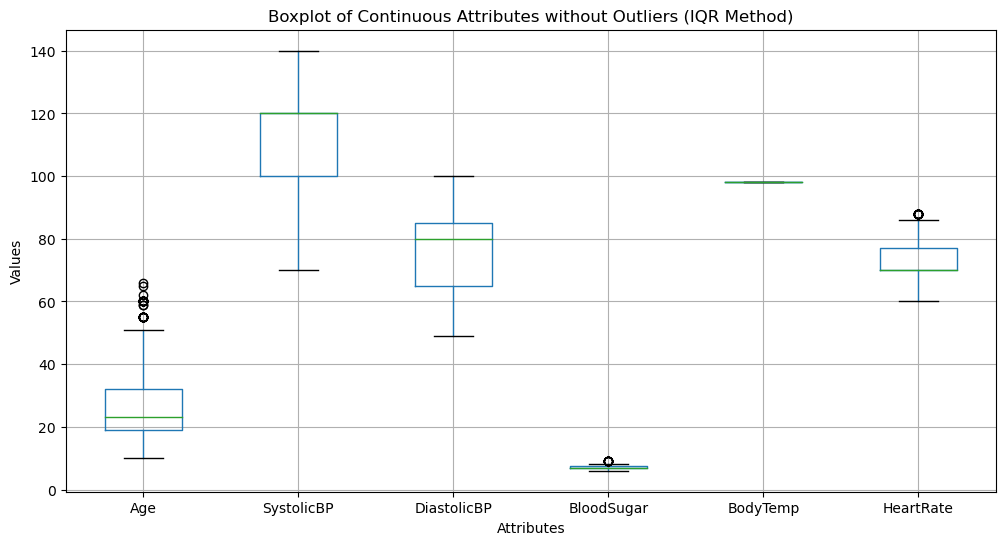

In [19]:
# Identify outliers using IQR method
Q1 = Maternal_Health[continuous_attributes].quantile(0.25)
Q3 = Maternal_Health[continuous_attributes].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((Maternal_Health[continuous_attributes] < lower_bound) | (Maternal_Health[continuous_attributes] > upper_bound)).any(axis=1)

# Generate box plots with outliers
plt.figure(figsize=(12, 6))
Maternal_Health[continuous_attributes].boxplot()
plt.title("Boxplot of Continuous Attributes with Outliers (IQR Method)")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.show()

# Remove outliers
mh_no_outliers = Maternal_Health[~outliers]

# Generate box plots without outliers
plt.figure(figsize=(12, 6))
mh_no_outliers[continuous_attributes].boxplot()
plt.title("Boxplot of Continuous Attributes without Outliers (IQR Method)")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.show()


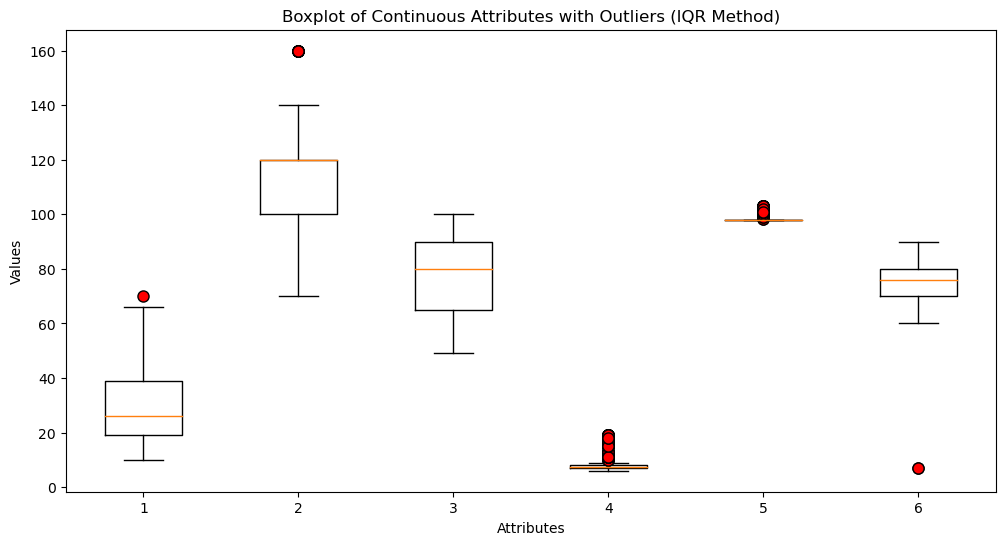

In [20]:
plt.figure(figsize=(12, 6))
plt.boxplot(Maternal_Health[continuous_attributes], flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title("Boxplot of Continuous Attributes with Outliers (IQR Method)")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.show()


In [21]:
print(mh_no_outliers.shape)
mh_no_outliers.describe()

(620, 7)


,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,620.000000,620.000000,620.000000,620.000000,620.0,620.000000
mean,27.843548,111.664516,75.374194,7.158887,98.0,73.009677
std,12.048624,16.805848,13.204688,0.568547,0.0,6.459260
min,10.000000,70.000000,49.000000,6.000000,98.0,60.000000
25%,19.000000,100.000000,65.000000,6.800000,98.0,70.000000
50%,23.000000,120.000000,80.000000,7.000000,98.0,70.000000
75%,32.000000,120.000000,85.000000,7.500000,98.0,77.000000
max,66.000000,140.000000,100.000000,9.000000,98.0,88.000000


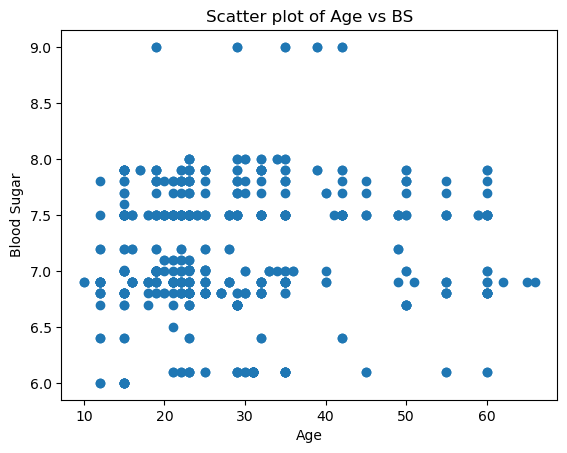

In [22]:
plt.scatter(mh_no_outliers['Age'], mh_no_outliers['BloodSugar'])
plt.xlabel('Age')
plt.ylabel('Blood Sugar')
plt.title('Scatter plot of Age vs BS')
plt.show()


In [23]:
X = mh_no_outliers[['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']]
y = mh_no_outliers[['RiskLevel']]
nrows, ncols = mh_no_outliers.shape

encoder = ce.OrdinalEncoder(cols=['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate'])
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc,y,test_size=0.3,shuffle=True)
X_train

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
830,13,2,5,6,1,7
365,13,2,5,11,1,7
344,21,11,2,4,1,4
43,1,2,3,2,1,1
806,6,2,3,13,1,6
...,...,...,...,...,...,...
79,10,4,2,4,1,11
259,10,2,3,4,1,2
203,5,2,3,1,1,1
332,3,3,4,4,1,1


Feature scores using Chi-square:  

Feature 0: 17.417506
Feature 1: 59.101343
Feature 2: 18.831879
Feature 3: 24.313057
Feature 4: 0.000000
Feature 5: 7.370758


<BarContainer object of 6 artists>

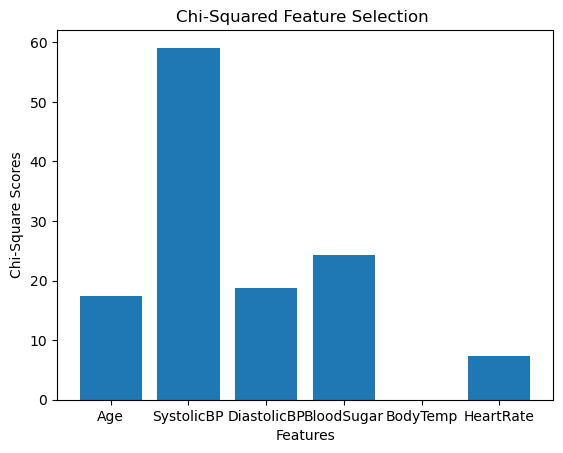

In [24]:
#Task 4
# Chi-squared feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Scores for each feature
print('Feature scores using Chi-square: ','\n')
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot scores
labels = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']
fig, ax = plt.subplots()
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Square Scores")
ax.set_title("Chi-Squared Feature Selection ")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_,tick_label=labels)

In [25]:
correlation = mh_no_outliers[['HeartRate', 'SystolicBP']].corr(method='pearson')
print(correlation)


            HeartRate  SystolicBP
HeartRate    1.000000   -0.108729
SystolicBP  -0.108729    1.000000


C:\Users\William\AppData\Local\Temp\ipykernel_1744\1728721006.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = mh_heatcalc.corr()


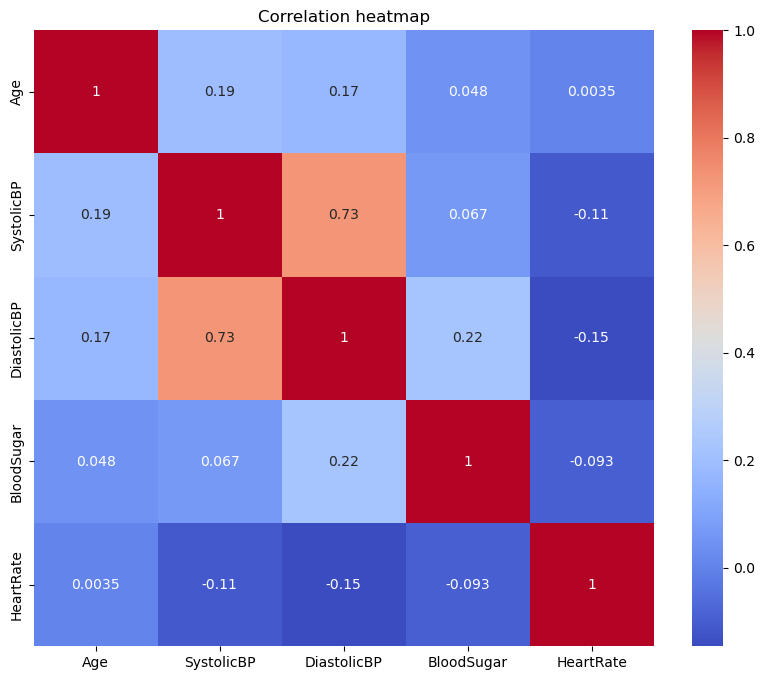

In [26]:
mh_heatcalc = mh_no_outliers.drop(['BodyTemp'],axis=1)

# Calculate the correlation matrix
correlation = mh_heatcalc.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.title('Correlation heatmap')
plt.show()

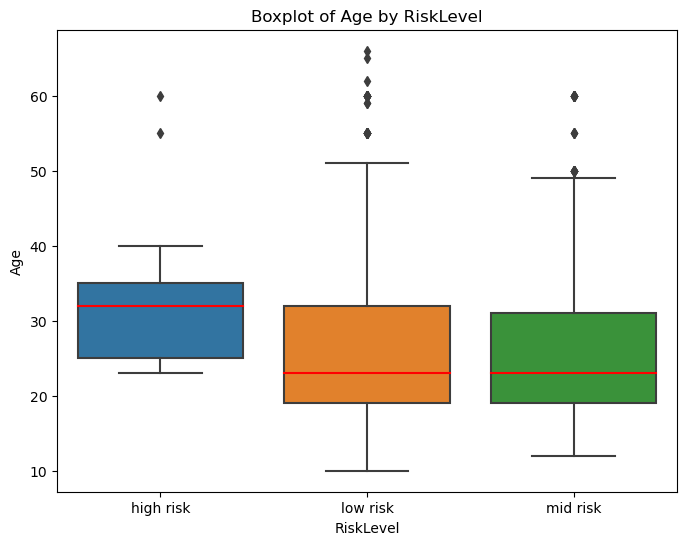

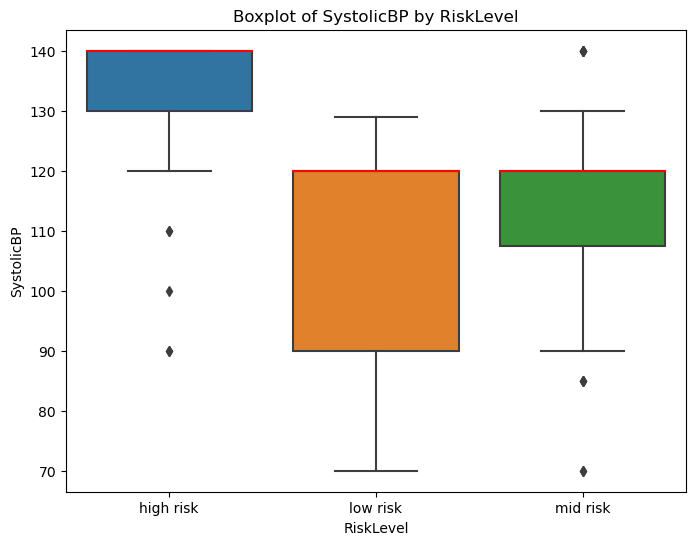

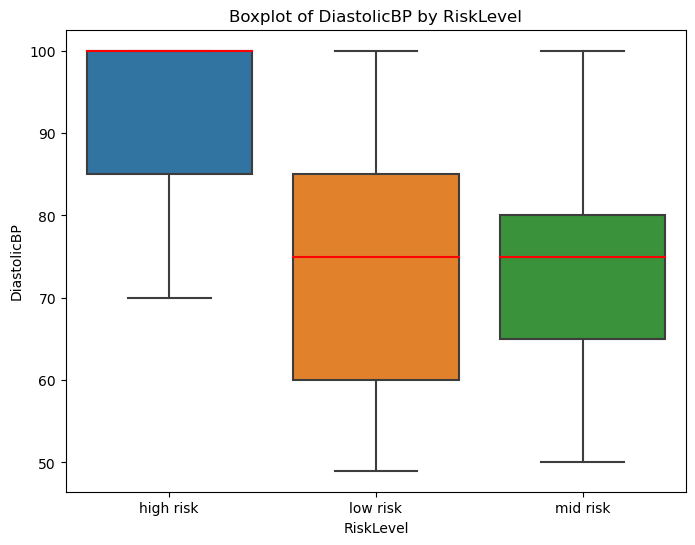

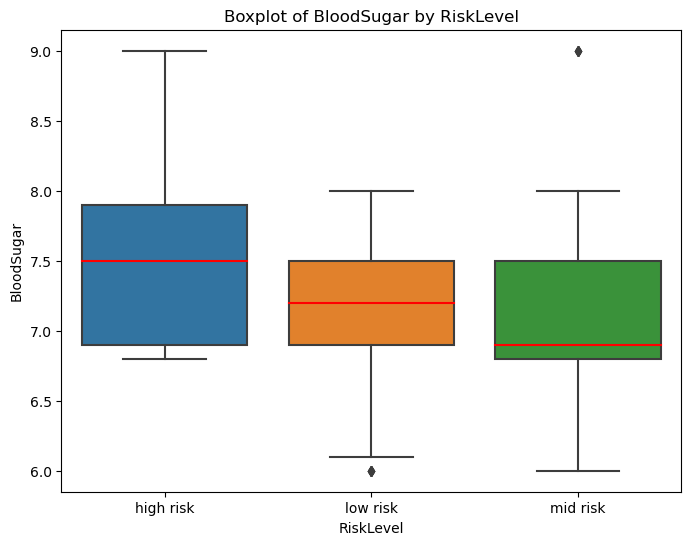

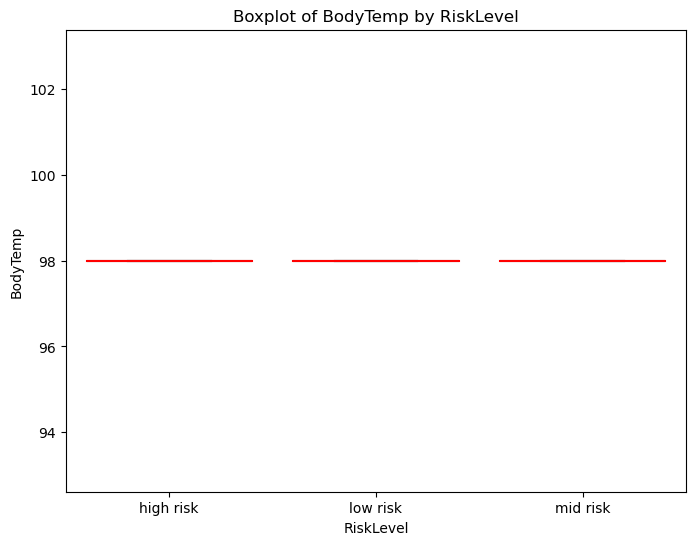

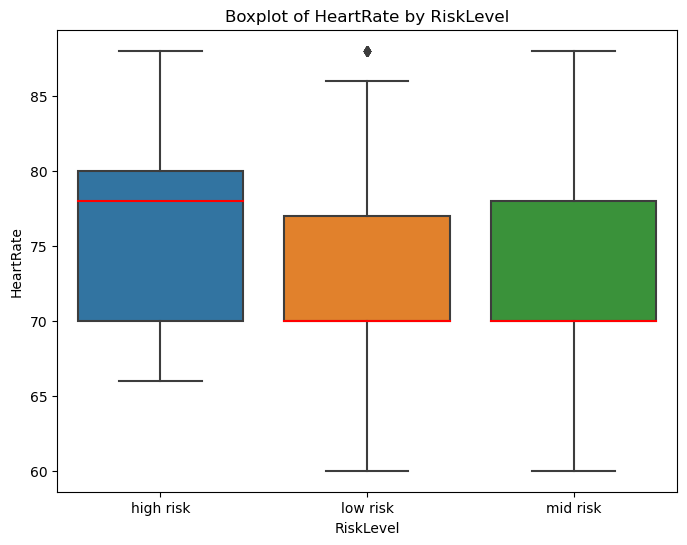

In [27]:

# Select the continuous attributes
continuous_attributes = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']

# Create boxplots for each continuous attribute grouped by RiskLevel
for attribute in continuous_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RiskLevel', y=attribute, data=mh_no_outliers,medianprops=dict(color='red'))
    plt.title(f'Boxplot of {attribute} by RiskLevel')
    plt.xlabel('RiskLevel')
    plt.ylabel(attribute)
    plt.show()


In [28]:
print(Maternal_Health.describe())
count = (Maternal_Health['BodyTemp'] > 98).sum()
print(count)


               Age   SystolicBP  DiastolicBP   BloodSugar     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  
210


In [29]:
filtered_rows = Maternal_Health[Maternal_Health['BodyTemp'] > 98]
print(filtered_rows)


      Age  SystolicBP  DiastolicBP  BloodSugar  BodyTemp  HeartRate  RiskLevel
2      29          90           70        8.00     100.0         80  high risk
7      35          85           60       11.00     102.0         86  high risk
13     20         120           75        7.01     100.0         70   mid risk
18     30         120           80        6.90     101.0         76   mid risk
35     12          95           60        6.10     102.0         60   low risk
...   ...         ...          ...         ...       ...        ...        ...
1000   12          90           60       11.00     102.0         60  high risk
1004   13          90           65        9.00     101.0         80  high risk
1005   17          90           65        7.70     103.0         67  high risk
1006   17          85           60        6.30     102.0         86  high risk
1013   32         120           65        6.00     101.0         76   mid risk

[210 rows x 7 columns]
